In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
twitts_train = pd.read_csv("../data/twitter_training.csv")
twitts_valid = pd.read_csv("../data/twitter_validation.csv")

In [4]:
column_name=['tweetID','entity','sentiment','tweet_content']
twitts_train.columns=column_name
twitts_valid.columns=column_name
# Remove the irrelevant sentiment label
twitts_train['sentiment'] = twitts_train['sentiment'].str.lower()
twitts_valid['sentiment'] = twitts_valid['sentiment'].str.lower()
twitts_train = twitts_train[twitts_train['sentiment'].isin(['positive', 'negative', 'neutral'])]
twitts_valid = twitts_valid[twitts_valid['sentiment'].isin(['positive', 'negative', 'neutral'])]

twitts=pd.concat([twitts_train,twitts_valid],ignore_index=False)
twitts.head()

,tweetID,entity,sentiment,tweet_content
0,2401,Borderlands,positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,positive,im getting into borderlands and i can murder y...


In [5]:
twitts.columns.tolist()


['tweetID', 'entity', 'sentiment', 'tweet_content']

In [6]:
twitts.info()


<class 'pandas.core.frame.DataFrame'>
Index: 62519 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweetID        62519 non-null  int64 
 1   entity         62519 non-null  object
 2   sentiment      62519 non-null  object
 3   tweet_content  61948 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.4+ MB


In [7]:
twitts.isnull().sum()


tweetID            0
entity             0
sentiment          0
tweet_content    571
dtype: int64

In [8]:
twitts.duplicated().sum()


np.int64(2726)

In [9]:
twitts.dropna(inplace=True)
twitts.drop_duplicates(inplace=True)
print("null values:","\n",twitts.isnull().sum())
print("duplicated values:",twitts.duplicated().sum())

null values: 
 tweetID          0
entity           0
sentiment        0
tweet_content    0
dtype: int64
duplicated values: 0


In [10]:
twitts.head()

,tweetID,entity,sentiment,tweet_content
0,2401,Borderlands,positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,positive,im getting into borderlands and i can murder y...


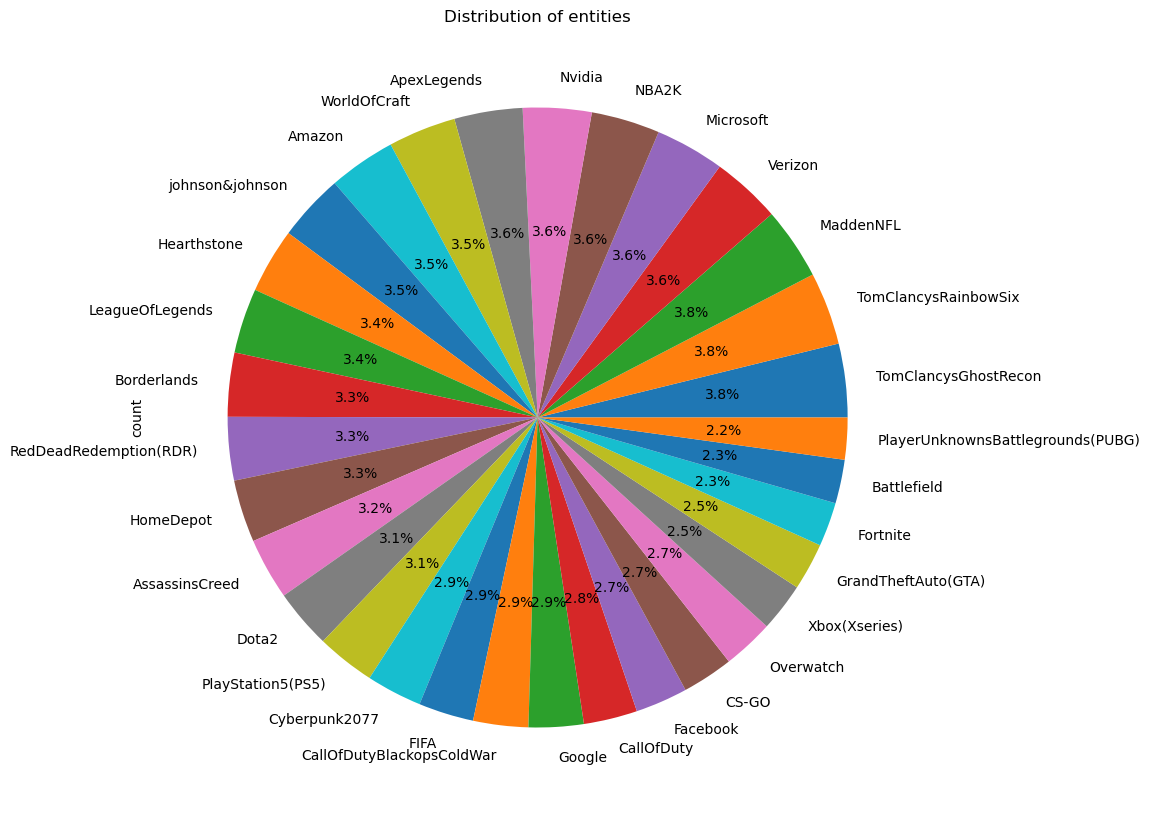

In [11]:
entity_content=twitts['entity'].value_counts()
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of entities')

plt.show()

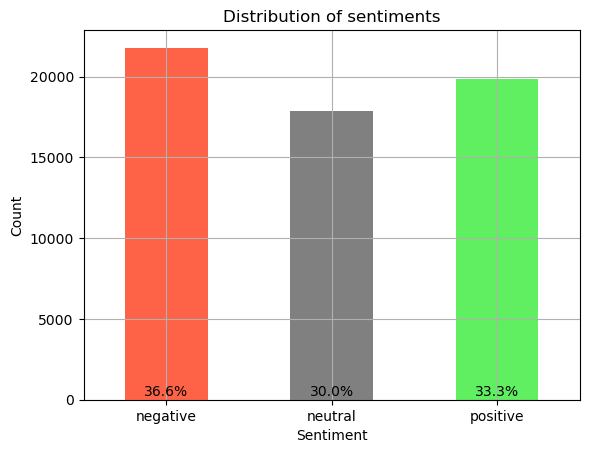

In [12]:
sentiment_content=twitts['sentiment'].value_counts()
# put neutral sentiment on the middle
sentiment_content = sentiment_content.reindex(['negative', 'neutral', 'positive'], fill_value=0)
# Red, gray, and green colors for negative, neutral, and positive sentiments but clarified
colors = ['#FF6347', '#808080', "#60EF60"]  # Tomato, Gray, LimeGreen
sentiment_content.plot(kind='bar',color=colors,grid=True)

# by percentage
sentiment_percentage = sentiment_content / sentiment_content.sum() * 100
for i, v in enumerate(sentiment_percentage):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom')
plt.title('Distribution of sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()

- at the above figure we can see the number of the negative reactions are above to 20000
- the min number of the reactions are the number of the irrelevant reactions are less tan 15000

Text(0, 0.5, 'Number of reactions')

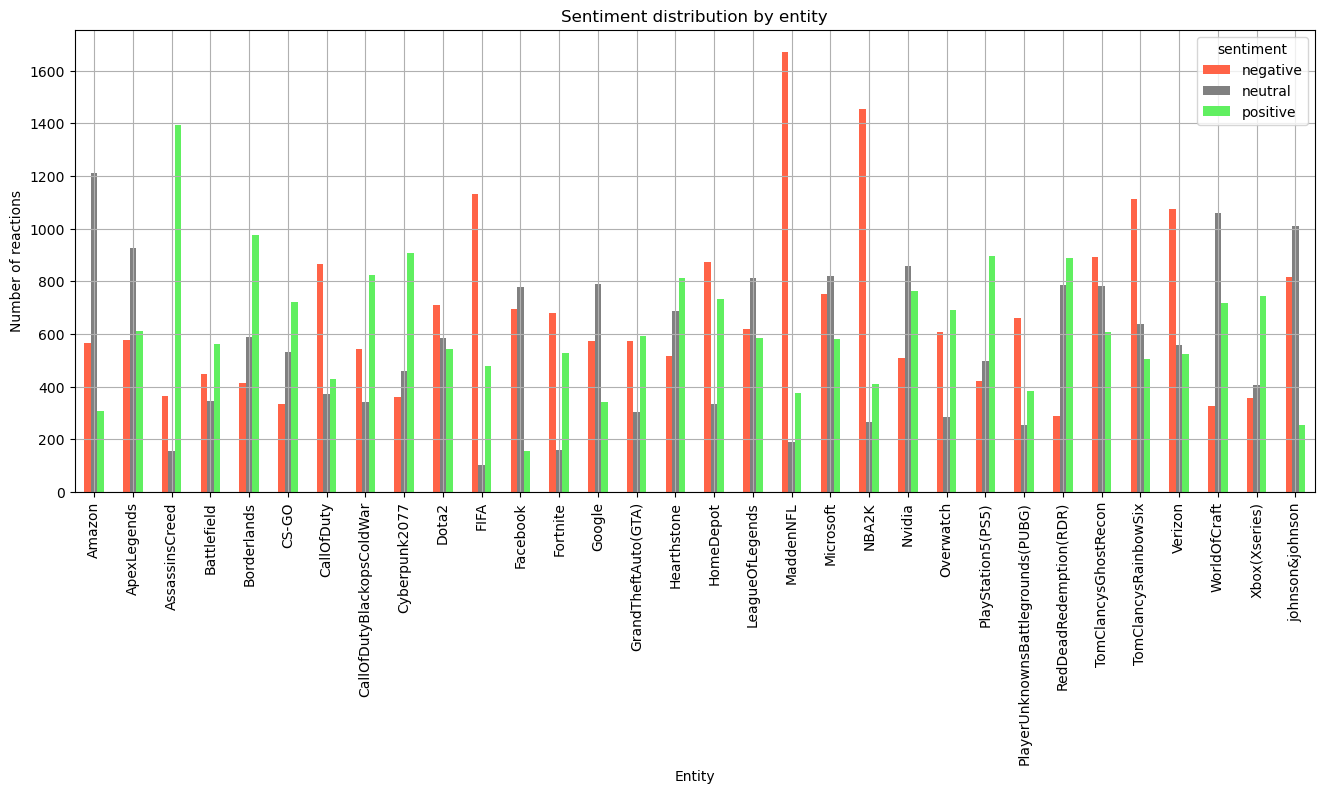

In [13]:
reactions_entities = pd.crosstab(twitts['entity'],twitts['sentiment'])
reactions_entities.plot(kind='bar', figsize=(16, 6),grid=True, 
                        title='Sentiment distribution by entity', color=colors)
plt.xlabel('Entity')
plt.ylabel('Number of reactions')

